##Diabetes Data (Regularization)
###L2 (Ridge) Regularization 
L2 aka least squares

L1 aka least absolute deviations

In [13]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import LinearRegression
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.cross_validation as cv
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
import pdb

diabetes = load_diabetes()
X = diabetes.data[:150]
y = diabetes.target[:150]

In [2]:
X[0:5]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665645,  0.01219057,
         0.02499059, -0.03603757,  0.03430886,  0.02269202, -0.00936191],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187235,  0.00393485,
         0.01559614,  0.00814208, -0.00259226, -0.03199144, -0.04664087]])

In [3]:
print X.shape, y.shape

(150, 10) (150,)


In [4]:
train_feature, test_feature, train_target, test_target = \
cv.train_test_split(X, y, test_size=0.3)

In [5]:
lin = LinearRegression()
lin.fit(train_feature, train_target)
train_predict = lin.predict(train_feature)
test_predict = lin.predict(test_feature)
train_mse = mean_squared_error(train_target, train_predict)
test_mse = mean_squared_error(test_target, test_predict)

train_mse, test_mse

(2821.6227611662589, 2385.9182204789117)

In [6]:
# Center to the mean and component wise scale to unit variance.
# Because you want to see the actual effect of the feature on the target, not influenced 
# by scale (large or small values)
X_data = preprocessing.scale(X)
train_feature, test_feature, train_target, test_target = \
cv.train_test_split(X_data, y, test_size=0.3)
# Normalize before regression
ridge = Ridge(alpha=5, normalize=True)
ridge.fit(train_feature, train_target)

train_predict = ridge.predict(train_feature)
test_predict = ridge.predict(test_feature)
train_mse = mean_squared_error(train_target, train_predict)
test_mse = mean_squared_error(test_target, test_predict)

train_mse, test_mse
# train mse is higher, so is test mse

(4430.0700813155963, 3646.5248645519437)

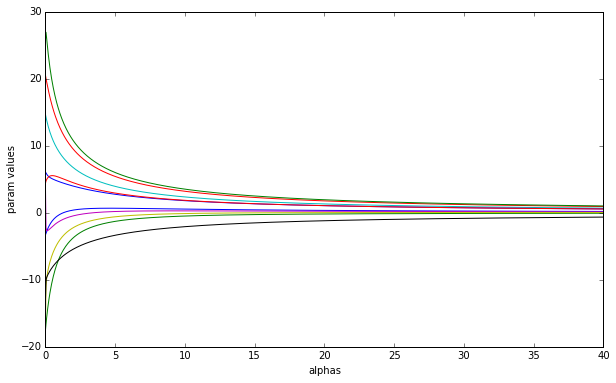

In [7]:
k = X.shape[1]
alphas = np.linspace(0, 40, 1000)
params = np.zeros((len(alphas), k))
for i,a in enumerate(alphas):
    # Center to the mean and component wise scale to unit variance.
    X_data = preprocessing.scale(X) 
    fit = Ridge(alpha=a, normalize=True).fit(X_data, y)
    params[i] = fit.coef_

figure(figsize=(10,6))
for param in params.T:
    plt.plot(alphas, param)
plt.ylabel('param values')
plt.xlabel('alphas')
plt.show()

In [8]:
alphas = np.logspace(-2, 2, 200)
mse_test = np.zeros(len(alphas))
mse_train = np.zeros(len(alphas))

def KFoldCVModel(model, kf, n_folds):
    j = 0
    train_error = np.zeros(n_folds)
    test_error = np.zeros(n_folds)
    for train, test in kf:
        model.fit(X_data[train], y[train])
        pred = model.predict(X_data[test])     
        train_error[j] = mean_squared_error(y[train], model.predict(X_data[train]))
        test_error[j] = mean_squared_error(y[test], model.predict(X_data[test]))
        j += 1
    return train_error, test_error

for i,a in enumerate(alphas):
    ridge = Ridge(alpha=a, normalize=True)
    k = len(X)
    n_folds = 5
    kf = cv.KFold(k, n_folds)
    train_error, test_error = KFoldCVModel(ridge, kf, n_folds)
    mse_test[i] = test_error.mean()
    mse_train[i] = train_error.mean()

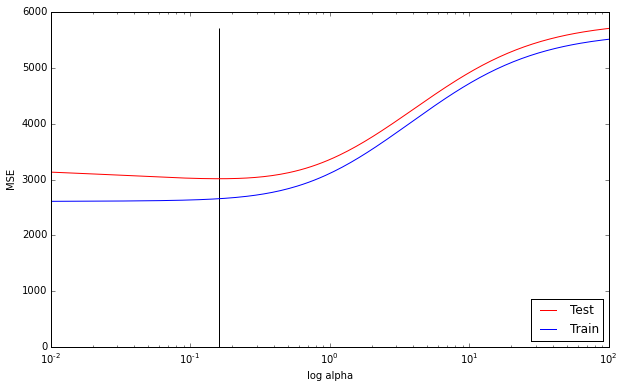

In [9]:
figure(figsize=(10,6))

plt.plot(alphas, mse_test, color = 'r', label = 'Test')
plt.plot(alphas, mse_train, color = 'b', label = 'Train')
plt.axes().set_xscale('log')
plt.xlabel('log alpha')
plt.ylabel('MSE')
plt.legend(loc=4)
plt.vlines(alphas[mse_test.argmin()], 0, mse_test.max())
ridge_alpha = alphas[mse_test.argmin()]
ridge_plot = plt.show()
ridge_plot

In [10]:
ridge_mse = mse_test[np.argmin(mse_test)]
ridge_alpha = alphas[np.argmin(mse_test)]

print ridge_alpha, ridge_mse
# The test mse for ridge regression is lower than linear regression

0.160705281826 3014.6412883


In [17]:
alphas = np.logspace(-2, 2, 200)
# RidgeCV automatically finds the optimal alpha
ridge = RidgeCV(alphas=alphas, store_cv_values=True, normalize=True)
ridge.fit(X_data,y)
ridge.alpha_

0.13354515629298988

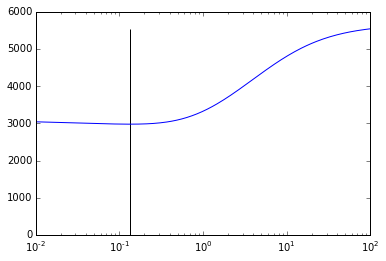

In [19]:
plt.plot(alphas,ridge.cv_values_.mean(axis=0))
plt.axes().set_xscale('log')
plt.vlines(alphas[ridge.cv_values_.mean(axis=0).argmin()], 0, 
           ridge.cv_values_.mean(axis=0).max())
# the optimal alpha is very close to the one that was found via kfold

### L1 (Lasso) Regularization

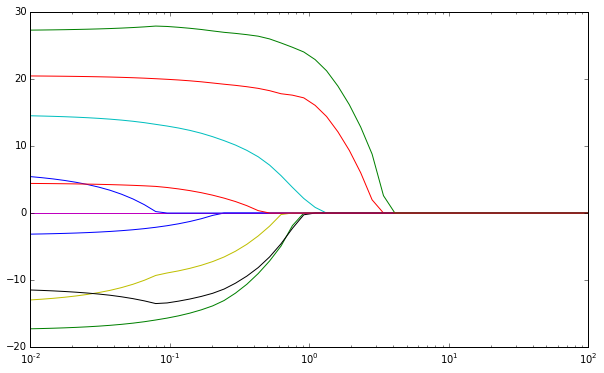

In [20]:
k = X.shape[1]
alphas = np.logspace(-2, 2)
params = np.zeros((len(alphas), k))
for i,a in enumerate(alphas):
    X_data = preprocessing.scale(X)
    fit = Lasso(alpha=a, normalize=True).fit(X_data, y)
    params[i] = fit.coef_

figure(figsize=(10,6))
for param in params.T:
    plt.plot(alphas, param)
plt.axes().set_xscale('log')
lasso_plot = plt.show()
lasso_plot

In [22]:
alphas = np.logspace(-2, 2)
mse_test = np.zeros(len(alphas))
mse_train = np.zeros(len(alphas))
for i,a in enumerate(alphas):
    ridge = Lasso(alpha=a, normalize=True)
    k = len(X)
    n_folds = 5
    kf = cv.KFold(k, n_folds)
    train_error, test_error = KFoldCVModel(ridge, kf, n_folds)
    mse_test[i] = test_error.mean()
    mse_train[i] = train_error.mean()

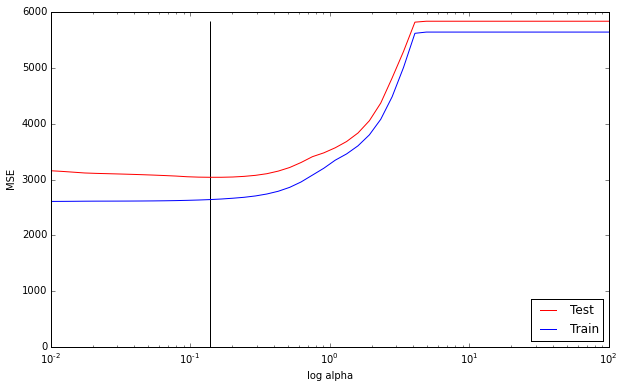

In [23]:
figure(figsize=(10,6))

plt.plot(alphas, mse_test, color = 'r', label = 'Test')
plt.plot(alphas, mse_train, color = 'b', label = 'Train')
plt.axes().set_xscale('log')
plt.xlabel('log alpha')
plt.ylabel('MSE')
plt.legend(loc=4)
plt.vlines(alphas[mse_test.argmin()], 0, mse_test.max())
lasso_alpha = alphas[mse_test.argmin()]
lasso_plot = plt.show()
lasso_plot

In [24]:
lasso_mse = mse_test[np.argmin(mse_test)]
lasso_alpha = alphas[np.argmin(mse_test)]
print lasso_alpha, lasso_mse
# the test mse for lasso 3040 is greater than ridge 3014

0.138949549437 3040.63554061


In [27]:
alphas = np.logspace(-2, 2, 200)
# LassoCV automatically finds the optimal alpha
lasso = LassoCV(alphas=alphas, normalize=True)
lasso.fit(X_data,y)
lasso.alpha_

0.15343684089300125

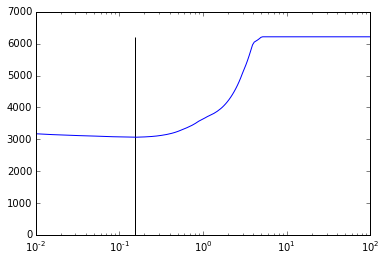

In [35]:
plt.plot(alphas,lasso.mse_path_.mean(axis=1)[::-1])
plt.axes().set_xscale('log')
plt.vlines(alphas[lasso.mse_path_.mean(axis=1)[::-1].argmin()], 0, 
           lasso.mse_path_.mean(axis=1)[::-1].max())
# the optimal alpha is very close to the one that was found via kfold

###Going to the full data set

In [38]:
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
X_data = preprocessing.scale(X)

In [47]:
alphas = np.logspace(-2, 2, 200)
# LassoCV 
lasso = LassoCV(alphas=alphas, normalize=True)
lasso.fit(X_data,y)
lasso.mse_path_.mean(axis=1).min()

3023.0508035655262

In [48]:
# RidgeCV 
ridge = RidgeCV(alphas=alphas, store_cv_values=True, normalize=True)
ridge.fit(X_data,y)
ridge.cv_values_.mean(axis=0).min()

2986.5402381145386

In [50]:
# LinearRegression
cv.cross_val_score(LinearRegression(), X, y, scoring='mean_squared_error', cv=10).mean()

-3000.3810328390509

In [51]:
# Regularization didn't improve the MSE that much
# Conclusion:
# Smaller the data, higher the chance of overfitting. With a larger data set,
# regularization does not improve the MSE.